In [1]:
import numpy as np
import pandas as pd
import pickle as pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [57]:
import sys
sys.path.append('/home/jfear/devel/GalaxyTools')
from runOrderRegression import *

In [3]:
%qtconsole

In [5]:
trans = pickle.load(open('/home/jfear/tmp/trans.pkl', 'rb'))

In [54]:
result = trans.apply(runOrder, axis=0)

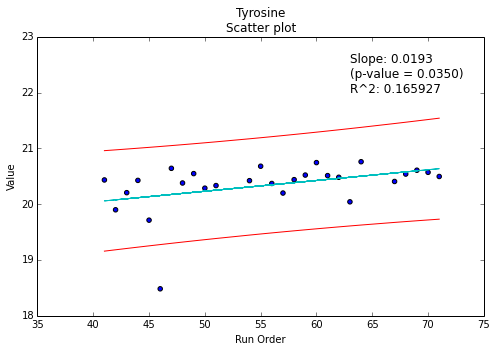

In [71]:
row = result[11]
name, x, y, res = row
fitted = res.fittedvalues

# Get slope and p-value
slope = res.params['run']
pval = res.pvalues['run']
rsq = res.rsquared

# Make Flag based on p-value
flag_runOrder_pval_05 = flagPval(pval, 0.05)
flag_runOrder_pval_01 = flagPval(pval, 0.01)

# Make scatter plot if p-pvalue is less than 0.05
if flag_runOrder_pval_05 == 1:
    # Get 95% CI
    prstd, lower, upper = wls_prediction_std(res)

    # Sort CIs for Plotting
    toPlot = pd.DataFrame({'x': x, 'lower': lower, 'upper': upper})
    toPlot.sort(columns='x', inplace=True)

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.scatter(x, y)
    ax.set_ylim(18, 23)
    ax.plot(toPlot['x'], toPlot['lower'], 'r-')
    ax.plot(x, fitted, 'c-')
    ax.plot(toPlot['x'], toPlot['upper'], 'r-')
    ax.set_xlabel('Run Order')
    ax.set_ylabel('Value')
    ax.set_title(u'Tyrosine\nScatter plot')
    ax.text(.7, .8, u'Slope: {0:.4f}\n(p-value = {1:.4f})\nR^2: {2:4f}'.format(slope, pval, rsq),
            transform=ax.transAxes, fontsize=12)

    fig.savefig('/home/jfear/devel/GalaxyTools/images/runOrder_plot.png')